<h1>Predicting Term Deposit Subscriptions in Direct Marketing Campaigns</h1>
In this project, we analyze data from a banking institution’s direct marketing campaigns. 

The dataset can be downloaded from <a href="https://archive.ics.uci.edu/dataset/222/bank+marketing">UCI Machine Learning Repository</a><br>

[1. Imports and Reading Data](#cell_1)<br>
[2. Data Understanding](#cell_2)<br>
[3. Exporatory Data Analysis](#cell_4)<br>
[4. Data Preparation](#cell_3)<br>
[5. Model Preparation](#cell_6)<br>

<h2>Imports and Reading Data</h2>
<a id = "cell_1"></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h2>Data Understanding</h2>
<a id = "cell_2"></a>

In [13]:
print("No. of Rows: ",df.shape[0])
print("No. of Columns: ",df.shape[1])
print("List of Columns: ",list(df.columns))

No. of Rows:  45211
No. of Columns:  17
List of Columns:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


Check for Null Values

In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Statistics for Numerical Features

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h2>Exploratory Data Analysis</h2>
<a id="cell_4"></a>

Splitting features into Categorical and Numerical

In [16]:
col = list(df.columns)
categorical_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]
numerical_features = [i for i in list(df.columns) if i in list(df.describe().columns)]

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Features : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Distribution of Target Variable

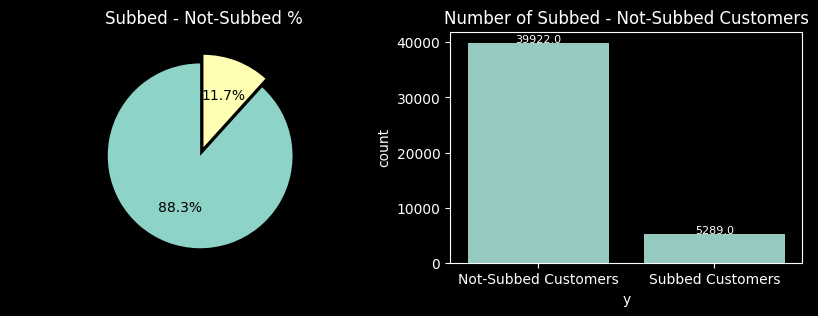

In [17]:
l = list(df['y'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,3))

plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Subbed Customer','Subbed Customer'],
        autopct = '%1.1f%%',
        startangle = 90,
        explode = (0.1,0),
        textprops={'color': 'black'})
plt.title('Subbed - Not-Subbed %')

plt.subplot(1,2,2)
ax = sns.countplot(x = 'y',data = df)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 8)
ax.set_xticklabels(['Not-Subbed Customers','Subbed Customers'])
    
plt.title('Number of Subbed - Not-Subbed Customers')
plt.show()

Distribution of Numerical Features

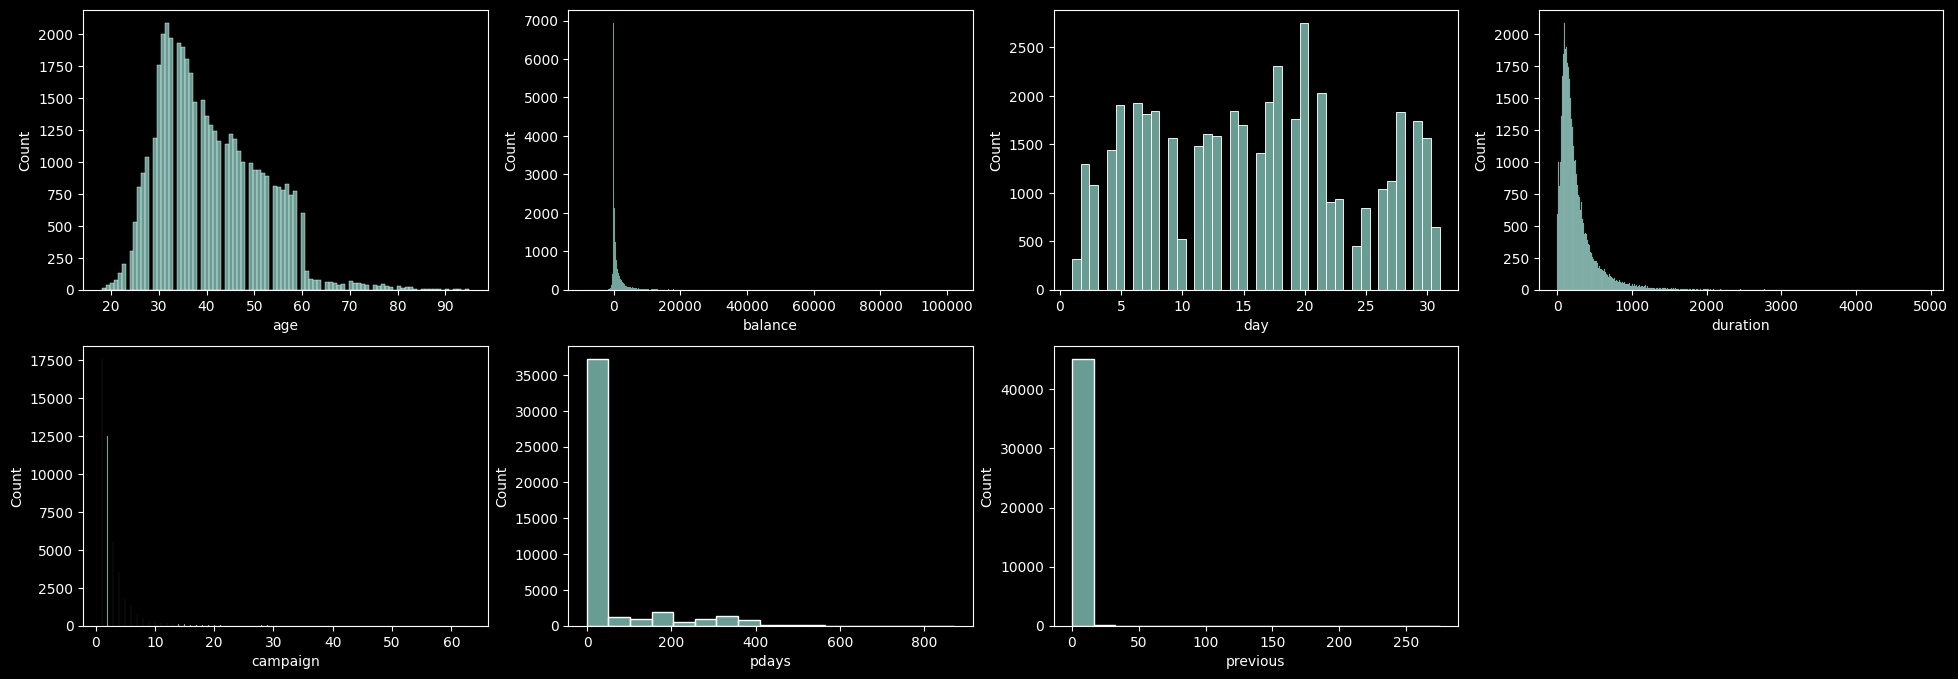

In [18]:
plt.figure(figsize=(24,8))
for i,col in enumerate(numerical_features):
    plt.subplot(2,4,i+1)
    sns.histplot(df[col])

<h2>Data Preparation</h2>
<a id="cell_3"></a>

Label Encoding of Categorical Features

In [19]:
le = LabelEncoder()
df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
job  :  [ 4  9  2  1 11  5  0  7  6 10  3  8]  =  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  :  [1 2 0]  =  ['married' 'single' 'divorced']
education  :  [2 1 3 0]  =  ['tertiary' 'secondary' 'unknown' 'primary']
default  :  [0 1]  =  ['no' 'yes']
housing  :  [1 0]  =  ['yes' 'no']
loan  :  [0 1]  =  ['no' 'yes']
contact  :  [2 0 1]  =  ['unknown' 'cellular' 'telephone']
month  :  [ 8  6  5  1 10  9  2  4  3  7  0 11]  =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  :  [3 0 1 2]  =  ['unknown' 'failure' 'other' 'success']
y  :  [0 1]  =  ['no' 'yes']


Correlation Matrix

<Axes: >

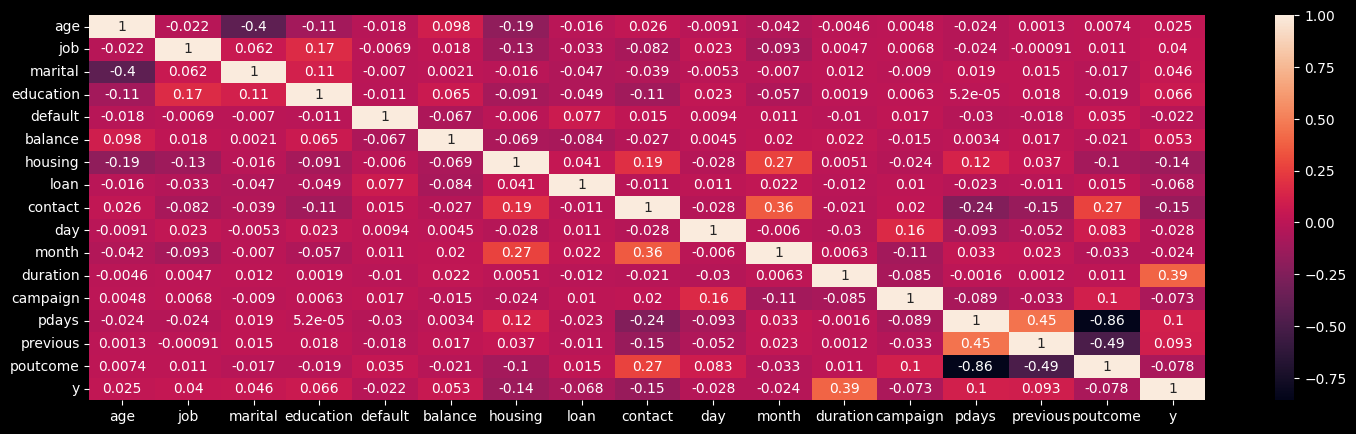

In [20]:
plt.figure(figsize = (18,5))
sns.heatmap(df1.corr(),annot = True)

Feature Scaling

In [21]:
mms = MinMaxScaler()
for col in numerical_features:
    df1[col] = mms.fit_transform(df1[[col]])

Oversampling

In [22]:
df1['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [23]:
f = df1.iloc[:,:-1].values
t = df1.iloc[:,-1].values

In [24]:
over = SMOTE(sampling_strategy = 1)
f1, t1 = over.fit_resample(f, t)
Counter(t1)

Counter({0: 39922, 1: 39922})

<h2>Model Preparation</h2>
<a id="cell_6"></a>

In [25]:
def split(f1,t1,train_ratio):
    x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 1-train_ratio, random_state = 2)
    return x_train, x_test, y_train, y_test

def model_evaluation(classifier,x_test,y_test):
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    print(classification_report(y_test,classifier.predict(x_test)))

In [26]:
train_ratio = 0.8
x_train, x_test, y_train, y_test = split(f1,t1,train_ratio)

Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.68      0.55      0.61      8056
           1       0.62      0.74      0.67      7913

    accuracy                           0.64     15969
   macro avg       0.65      0.64      0.64     15969
weighted avg       0.65      0.64      0.64     15969



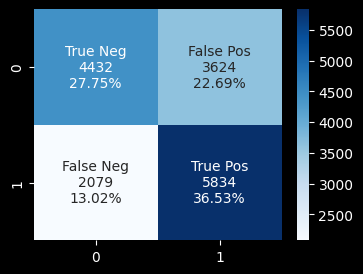

In [27]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train,y_train)
model_evaluation(nb_classifier,x_test,y_test)

Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      8056
           1       0.81      0.84      0.82      7913

    accuracy                           0.82     15969
   macro avg       0.82      0.82      0.82     15969
weighted avg       0.82      0.82      0.82     15969



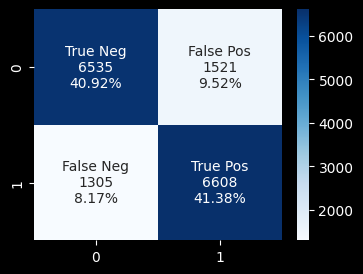

In [28]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train,y_train)
model_evaluation(lr_classifier,x_test,y_test)

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8056
           1       0.89      0.91      0.90      7913

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969



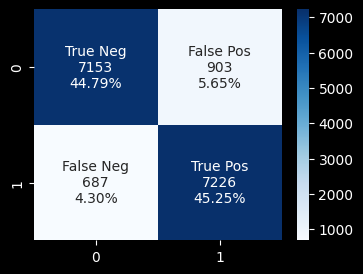

In [29]:
dt_classifier = DecisionTreeClassifier(criterion="gini",random_state = 0,max_depth = 20)
dt_classifier.fit(x_train,y_train)
model_evaluation(dt_classifier,x_test,y_test)

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8056
           1       0.91      0.97      0.94      7913

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



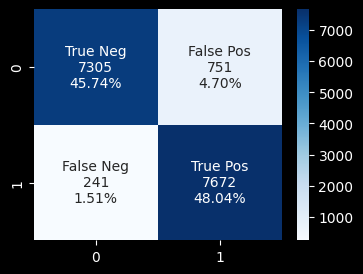

In [30]:
rf_classifier = RandomForestClassifier(random_state=0,max_depth=20)
rf_classifier.fit(x_train,y_train)
model_evaluation(rf_classifier,x_test,y_test)

Extreme Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8056
           1       0.93      0.96      0.95      7913

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969



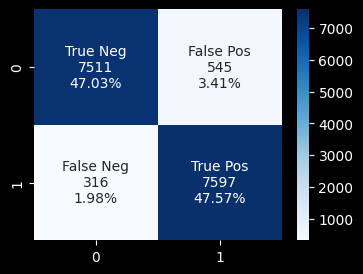

In [31]:
xgb_classifier = XGBClassifier(learning_rate= 0.1,max_depth = 20)
xgb_classifier.fit(x_train,y_train)
model_evaluation(xgb_classifier,x_test,y_test)

In [32]:
def final_report(classifier,x_test,y_test):
    y_pred = classifier.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    print("\nAccuracy:", "{:.2f}".format(report['accuracy']))
    print("Specificity:", "{:.2f}".format(report['0']['recall']))
    print("Sensitivity:", "{:.2f}".format(report['1']['recall']))
    print("Precision:", "{:.2f}".format(report['1']['precision']))
    print("FPR:", "{:.2f}".format(1 - report['0']['recall']))
    print("FNR:", "{:.2f}".format(1 - report['1']['recall']))
    print("NPV:", "{:.2f}".format(report['0']['precision']))
    print("FDR:", "{:.2f}".format(1 - report['1']['precision']))
    print("F1-Score:", "{:.2f}".format(report['1']['f1-score']))
    mcc = matthews_corrcoef(y_test, y_pred)
    print("MCC:", "{:.2f}".format(mcc))
 

In [33]:
classifier_list = [nb_classifier,lr_classifier,dt_classifier,rf_classifier,xgb_classifier]
for classifier in classifier_list:
    final_report(classifier,x_test,y_test)


Accuracy: 0.64
Specificity: 0.55
Sensitivity: 0.74
Precision: 0.62
FPR: 0.45
FNR: 0.26
NPV: 0.68
FDR: 0.38
F1-Score: 0.67
MCC: 0.29

Accuracy: 0.82
Specificity: 0.81
Sensitivity: 0.84
Precision: 0.81
FPR: 0.19
FNR: 0.16
NPV: 0.83
FDR: 0.19
F1-Score: 0.82
MCC: 0.65

Accuracy: 0.90
Specificity: 0.89
Sensitivity: 0.91
Precision: 0.89
FPR: 0.11
FNR: 0.09
NPV: 0.91
FDR: 0.11
F1-Score: 0.90
MCC: 0.80

Accuracy: 0.94
Specificity: 0.91
Sensitivity: 0.97
Precision: 0.91
FPR: 0.09
FNR: 0.03
NPV: 0.97
FDR: 0.09
F1-Score: 0.94
MCC: 0.88

Accuracy: 0.95
Specificity: 0.93
Sensitivity: 0.96
Precision: 0.93
FPR: 0.07
FNR: 0.04
NPV: 0.96
FDR: 0.07
F1-Score: 0.95
MCC: 0.89
